In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from tqdm import auto

In [2]:
def f_get_Normalization(X, norm_mode):
    num_Patient, num_Feature = np.shape(X)

    if norm_mode == 'standard': #zero mean unit variance
        for j in range(num_Feature):
            if np.std(X[:,j]) != 0:
                X[:,j] = (X[:,j] - np.mean(X[:, j]))/np.std(X[:,j])
            else:
                X[:,j] = (X[:,j] - np.mean(X[:, j]))
    elif norm_mode == 'normal': #min-max normalization
        for j in range(num_Feature):
            X[:,j] = (X[:,j] - np.min(X[:,j]))/(np.max(X[:,j]) - np.min(X[:,j]))
    else:
        print("INPUT MODE ERROR!")

    return X

In [3]:
npz = np.load('physionet.npz')

data_x        = npz['x']
data_y        = npz['y']
data_t        = npz['t']
data_mask     = npz['mask']
feat_list     = npz['labels']


In [4]:
feat_list

array(['Age', 'Gender', 'Height', 'ICUType', 'Weight', 'Albumin', 'ALP',
       'ALT', 'AST', 'Bilirubin', 'BUN', 'Cholesterol', 'Creatinine',
       'DiasABP', 'FiO2', 'GCS', 'Glucose', 'HCO3', 'HCT', 'HR', 'K',
       'Lactate', 'Mg', 'MAP', 'MechVent', 'Na', 'NIDiasABP', 'NIMAP',
       'NISysABP', 'PaCO2', 'PaO2', 'pH', 'Platelets', 'RespRate', 'SaO2',
       'SysABP', 'Temp', 'TroponinI', 'TroponinT', 'Urine', 'WBC'],
      dtype='<U11')

In [5]:
from scipy.stats import mode

In [8]:
data_x.shape, data_mask.shape

((4000, 49, 41), (4000, 49, 41))

In [10]:
for i, name in enumerate(feat_list):
    vals = data_x[:,:,i][data_mask[:,:,i]==1]
    mean = vals.mean()
    min_,max_ = vals.min(),vals.max()
    [mode_],_ = mode(vals)
    print(f'{name} - mean: {mean:.3f}, min: {min_:.3f}, max: {max_:.3f}, mode:{mode_}')

Age - mean: 64.247, min: 15.000, max: 90.000, mode:90.0
Gender - mean: 0.561, min: -1.000, max: 1.000, mode:1.0
Height - mean: 88.919, min: -1.000, max: 431.800, mode:-1.0
ICUType - mean: 2.760, min: 1.000, max: 4.000, mode:3.0
Weight - mean: 81.065, min: -1.000, max: 300.000, mode:70.0
Albumin - mean: 2.923, min: 1.000, max: 5.300, mode:3.0999999046325684
ALP - mean: 116.792, min: 12.000, max: 2205.000, mode:61.0
ALT - mean: 393.953, min: 1.000, max: 11470.000, mode:17.0
AST - mean: 506.003, min: 4.000, max: 18430.000, mode:17.0
Bilirubin - mean: 2.911, min: 0.100, max: 47.700, mode:0.4000000059604645
BUN - mean: 27.412, min: 0.000, max: 197.000, mode:14.0
Cholesterol - mean: 156.517, min: 28.000, max: 330.000, mode:111.0
Creatinine - mean: 1.505, min: 0.100, max: 22.100, mode:0.699999988079071
DiasABP - mean: 59.544, min: 0.000, max: 268.000, mode:56.0
FiO2 - mean: 0.542, min: 0.210, max: 1.000, mode:0.4000000059604645
GCS - mean: 11.407, min: 3.000, max: 15.000, mode:15.0
Glucose - 

In [5]:
[idx], = np.where(feat_list=='ICUType')
ICUType = data_x[:,0,idx]
variable_name = 'GCS'
[idx], = np.where(feat_list==variable_name)
f = data_x[:,:,idx].copy()
t = data_t[:,:,idx]
mask = data_mask[:,:,idx]

In [6]:
np.unique(ICUType, return_counts=True)

(array([1., 2., 3., 4.], dtype=float32), array([ 577,  874, 1481, 1068]))

In [7]:
(mask==0).all(axis=-1).sum()/len(mask)

0.016

In [8]:
y_min, y_max = 0.8*np.min(f),1.2*np.max(f)
y_min=-0.1
f[mask==0] = np.nan

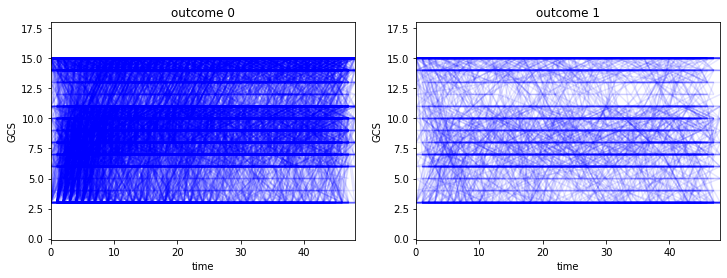

In [9]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(2*6,4))
for i in range(2):
    ax = axs[i]
    idx, = np.where(data_y==i)
    t1 = t[idx]
    x1 = f[idx]
    line_segments = LineCollection([np.column_stack([ti, xi]) for ti,xi in zip(t1, x1)], color='blue',alpha=0.1)
    ax.add_collection(line_segments)
    ax.set_ylim([y_min, y_max])
    ax.set_xlim([0, 48])
    ax.set_ylabel(variable_name)
    ax.set_xlabel('time')
    ax.set_title(f'outcome {i}')
    #ax.set_yscale('symlog')

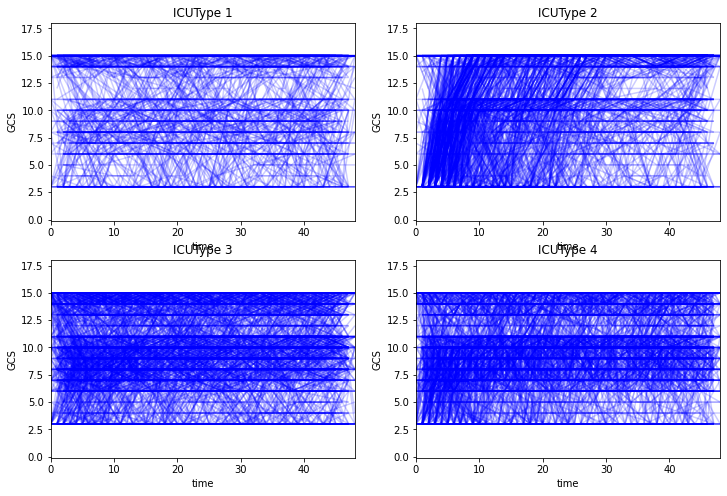

In [10]:
fig, axs = plt.subplots(nrows=2, ncols=2,  figsize=(2*6,4*2))
for i in range(4):
    ax = axs[i//2,i%2]
    idx, = np.where(ICUType==i+1)
    t1 = t[idx]
    x1 = f[idx]
    line_segments = LineCollection([np.column_stack([ti, xi]) for ti,xi in zip(t1, x1)], color='blue',alpha=0.2)
    ax.add_collection(line_segments)
    ax.set_ylim([y_min, y_max])
    ax.set_xlim([0, 48])
    
    ax.set_ylabel(variable_name)
    ax.set_xlabel('time')
    ax.set_title(f'ICUType {i+1}')


In [28]:
npz = np.load('physionet.npz')

data_x        = npz['x']
data_y        = npz['y']
data_t        = npz['t']
data_mask     = npz['mask']
feat_list     = npz['labels']


In [29]:
#considered_features  = ['Age','ICUType','BUN','HR','GCS','HCT','Temp']
considered_features  = ['Age','ICUType', 'Gender','GCS', 'PaCO2']#, 'NIMAP','HCT','PaO2'
considered_dims, = np.where(np.isin(feat_list,considered_features))
considered_features = feat_list[considered_dims]

In [30]:
# remove samples with less than two observations in either one considered temporal features
remove = data_mask[:,:,considered_dims[3:]].sum(axis=1).min(axis=-1)<2

In [31]:
lengths = data_mask.sum(axis=1)[:,considered_dims].max(axis=-1)
T  = int(lengths.max())
selected = (lengths<=T)&(~remove)
data_x = data_x[selected][:,:T,considered_dims]
data_mask = data_mask[selected][:,:T,considered_dims]
data_t = data_t[selected][:,:T,considered_dims]
data_y = data_y[selected]

In [32]:
N, T, x_dim = data_x.shape

In [33]:
N

2684

In [34]:
idx = data_mask.sum(axis=1).argmax(axis=-1)

In [35]:
times = data_t[np.arange(len(idx)),:,idx]
masks = data_mask[np.arange(len(idx)),:,idx]

In [36]:
data_x_interp = np.zeros_like(data_x)
for i in auto.trange(N):
    for dim in range(x_dim):
        mask = data_mask[i,:,dim]
        x = data_x[i,:,dim]
        t = data_t[i,:,dim]
        if mask.sum()==0:
            continue
        x_interp = np.interp(times[i],t[mask==1], x[mask==1])
        data_x_interp[i,:,dim] = x_interp
data_x_interp[masks==0]=0

  0%|          | 0/2684 [00:00<?, ?it/s]

In [37]:
N = len(data_x_interp)
data_y_new = np.zeros(times.shape)
data_y_new[np.arange(N),masks.sum(axis=1).astype('int')-1] = data_y

In [38]:
data_x_norm = data_x_interp.copy()
data_x_norm[masks==1] = f_get_Normalization(data_x_interp[masks==1], norm_mode='standard')
data_x_norm[masks==0] = 0

In [39]:
np.savez_compressed('selected_data.npz', data_x=data_x_norm, data_x_orig= data_x_interp,data_t=times, data_mask=masks, data_y = data_y_new, feat_list=considered_features)

In [40]:
npz = np.load('selected_data.npz')

data_x        = npz['data_x']
data_x_orig   = npz['data_x_orig']
data_y        = npz['data_y']
data_t        = npz['data_t']
data_mask     = npz['data_mask']
feat_list     = npz['feat_list']


In [41]:
feat_list

array(['Age', 'Gender', 'ICUType', 'GCS', 'PaCO2'], dtype='<U11')

In [42]:
y = data_y[np.arange(len(data_y)),data_mask.sum(axis=-1).astype('int')-1]

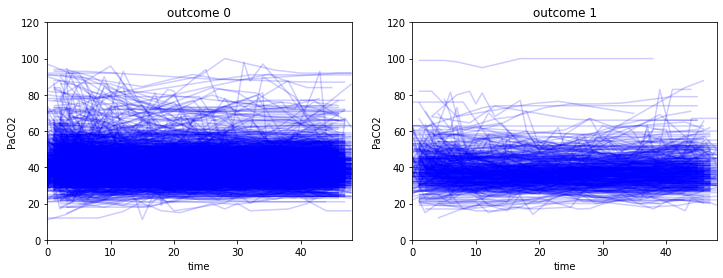

In [43]:
variable_name = 'PaCO2'
[idx], = np.where(feat_list==variable_name)
f = data_x_orig[:,:,idx].copy()
t = data_t
mask = data_mask

y_min, y_max = 0.8*np.min(f),1.2*np.max(f)
f[mask==0] = np.nan

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(2*6,4))
for i in range(2):
    ax = axs[i]
    idx, = np.where(y==i)
    t1 = t[idx]
    x1 = f[idx]
    line_segments = LineCollection([np.column_stack([ti, xi]) for ti,xi in zip(t1, x1)], color='blue',alpha=0.2)
    ax.add_collection(line_segments)
    ax.set_ylim([y_min, y_max])
    ax.set_xlim([0, 48])
    ax.set_ylabel(variable_name)
    ax.set_xlabel('time')
    ax.set_title(f'outcome {i}')


In [44]:
data_x.shape

(2684, 48, 5)